# Car Price Prediction

### Problem Statement

##### A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.

##### They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

##### - Which variables are significant in predicting the price of a car
#####    - How well those variables describe the price of a car


In [1]:
# importing the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
os.listdir()

['.ipynb_checkpoints',
 'Car Price Assignment.csv',
 'Car Price Prediction.ipynb']

##### Step 1:  Reading and Understanding the data

In [2]:
cars = pd.read_csv('Car Price Assignment.csv')
cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
cars.shape

(205, 26)

In [4]:
cars.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [5]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

##### Step 2: Data Cleaning and Preparation

In [6]:
# spliting Company name from carName column

CompanyName = cars.CarName.apply(lambda x: x.split(' ')[0])
cars.insert(3,"CompanyName",CompanyName)
cars.drop(["CarName"],axis=1,inplace=True)
cars.head()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [7]:
cars.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [8]:
# fix invalid values
# maxda = mazda
# Nissan = nissan
# porsche = porcshce
# toyouta = toyota
# vokswagen,vw = volkswagen

In [9]:
def replace_name(a,b):
    cars.CompanyName.replace(a,b,inplace=True)
    
replace_name('maxda','mazda')
replace_name('Nissan','nissan')
replace_name('porcshce','porsche')
replace_name('toyouta','toyota')
replace_name('vokswagen','volkswagen')
replace_name('vw','volkswagen')

cars.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [10]:
#checking the duplicates
cars.loc[cars.duplicated()]

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


##### Step 3: Visualizing the data

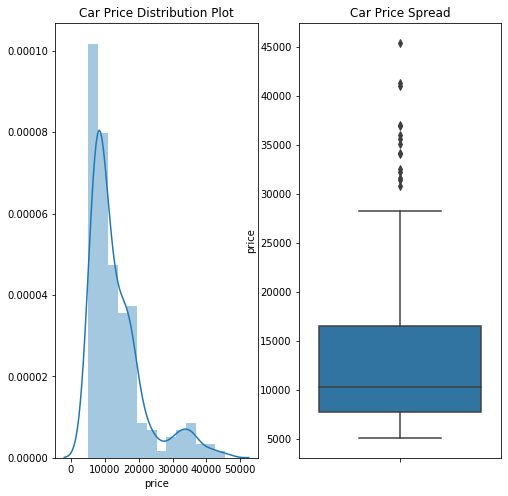

In [11]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.title('Car Price Distribution Plot')
sns.distplot(cars.price)

plt.subplot(1,2,2)
plt.title('Car Price Spread')
sns.boxplot(y=cars.price)

In [12]:
print(cars.price.describe(percentiles=[0.25,.5,.75,.85,.90,1]))

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
85%      18500.000000
90%      22563.000000
100%     45400.000000
max      45400.000000
Name: price, dtype: float64


##### 1. The plot seemed to be right-skewed, meaning that the most prices in the dataset are low(Below 15,000).
##### 2. There is a significant difference between the mean and the median of the price distribution.
##### 3. The data points are far spread out from the mean, which indicates a high variance in the car prices.(85% of the prices are below 18,500, whereas the remaining 15% are between 18,500 and 45,400.)

# visualizing the catagorical data

In [13]:
cars.select_dtypes(include=['object'])

,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi
...,...,...,...,...,...,...,...,...,...,...
200,volvo,gas,std,four,sedan,rwd,front,ohc,four,mpfi
201,volvo,gas,turbo,four,sedan,rwd,front,ohc,four,mpfi
202,volvo,gas,std,four,sedan,rwd,front,ohcv,six,mpfi
203,volvo,diesel,turbo,four,sedan,rwd,front,ohc,six,idi


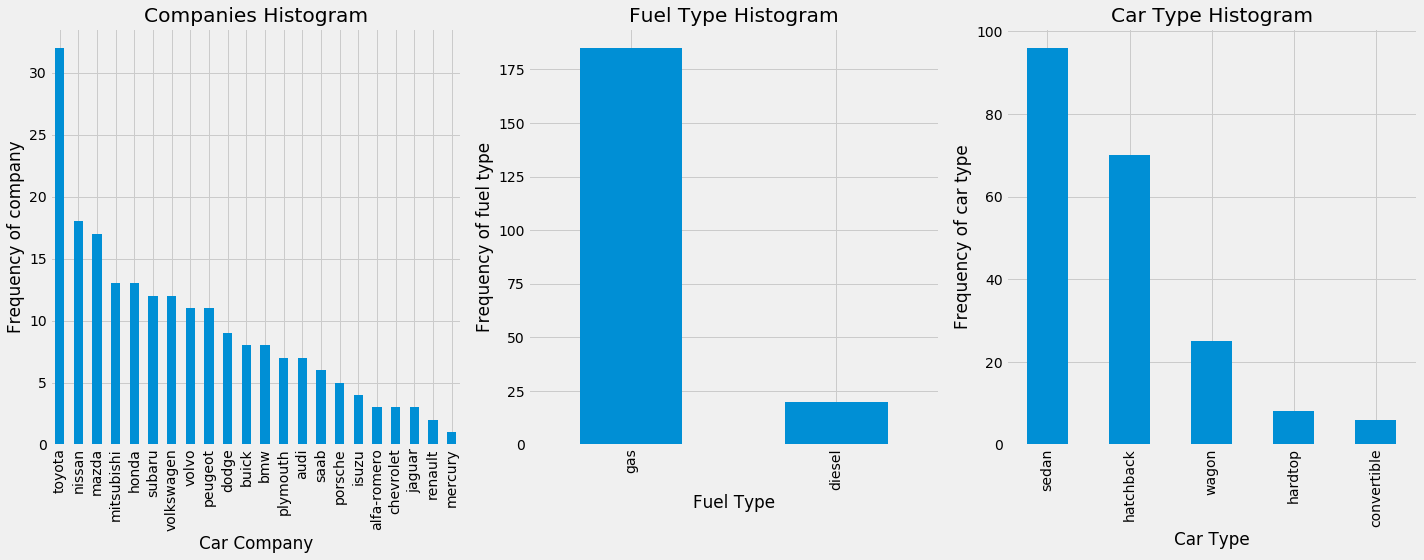

In [14]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(20,8))
plt.subplot(1,3,1)
plt1 = cars.CompanyName.value_counts().plot(kind='bar',title='Companies Histogram')
plt1.set(xlabel='Car Company',ylabel='Frequency of company')

plt.subplot(1,3,2)
plt2 = cars.fueltype.value_counts().plot(kind='bar',title='Fuel Type Histogram')
plt2.set(xlabel='Fuel Type',ylabel='Frequency of fuel type')

plt.subplot(1,3,3)
plt3 = cars.carbody.value_counts().plot(kind='bar',title='Car Type Histogram')
plt3.set(xlabel='Car Type',ylabel='Frequency of car type')

plt.tight_layout()

##### Toyota seemed to be favored car company.
##### Number of gas fueled cars are more than diesel.
##### sedan is the top car type prefered.

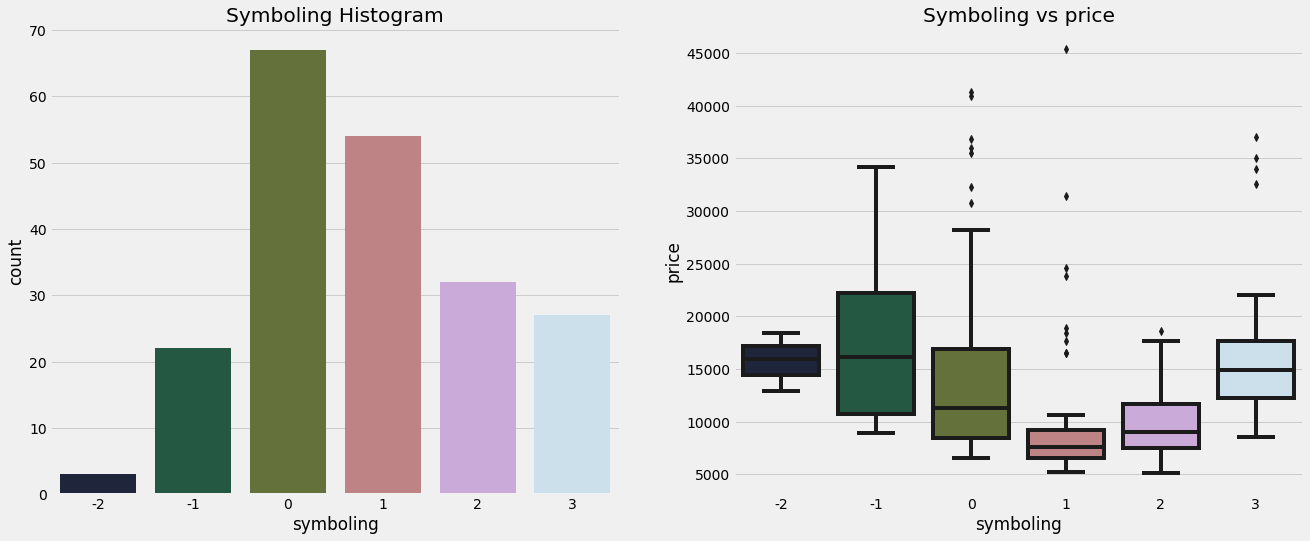

In [15]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Symboling Histogram')
sns.countplot(cars.symboling,palette=("cubehelix"))

plt.subplot(1,2,2)
plt.title("Symboling vs price")
sns.boxplot(x=cars.symboling,y=cars.price,palette=('cubehelix'))

##### It seems that the symboling with 0 and 1 values have high number of rows (i.e. They are most sold.)
##### The cars with -1 symboling seems to be high priced (as it makes sense too, insurance risk rating -1 is quite good). But it seems that symboling with 3 value has the price range similar to -2 value. There is a dip in price at symboling 1

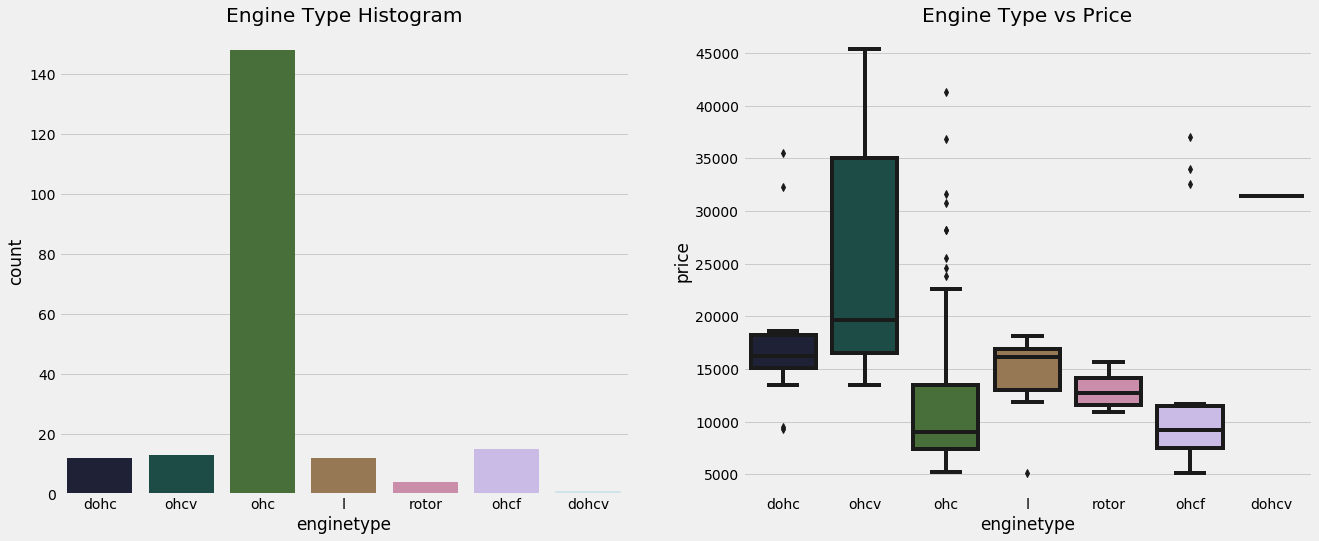

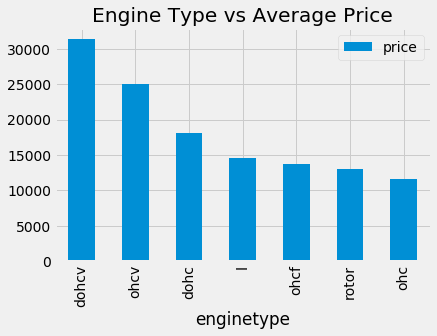

In [16]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Engine Type Histogram')
sns.countplot(cars.enginetype,palette=('cubehelix'))

plt.subplot(1,2,2)
plt.title('Engine Type vs Price')
sns.boxplot(x=cars.enginetype,y=cars.price,palette=('cubehelix'))

df = pd.DataFrame(cars.groupby(['enginetype'])['price'].mean().sort_values(ascending=False))

df.plot(kind='bar',title='Engine Type vs Average Price')


##### ohc Engine type seems to be most favored type.
##### ohcv has the highest price range (While dohcv has only one row), ohc and ohcf have the low price range

<Figure size 1800x432 with 0 Axes>

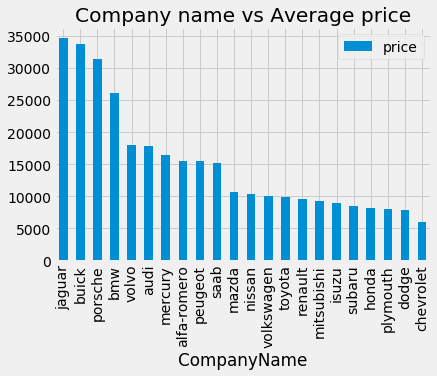

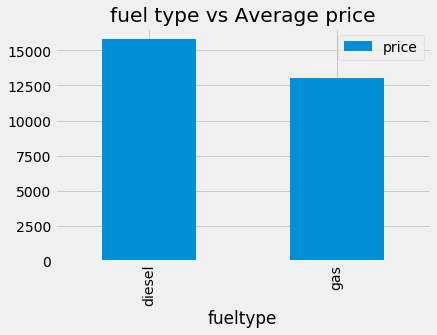

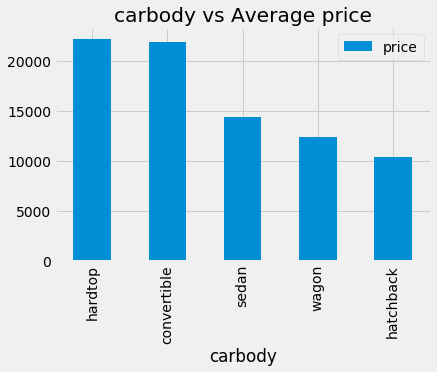

In [17]:
plt.figure(figsize=(25,6))

df = pd.DataFrame(cars.groupby(['CompanyName'])['price'].mean().sort_values(ascending=False))
df.plot.bar(title='Company name vs Average price')
plt.show()

df = pd.DataFrame(cars.groupby(['fueltype'])['price'].mean().sort_values(ascending=False))
df.plot.bar(title='fuel type vs Average price')
plt.show()

df = pd.DataFrame(cars.groupby(['carbody'])['price'].mean().sort_values(ascending=False))
df.plot.bar(title='carbody vs Average price')
plt.show()


##### jaguare and Buick seems to have highest average price.
##### diesel has higher average price than gas.
##### hardtop and convertible have higher average price.

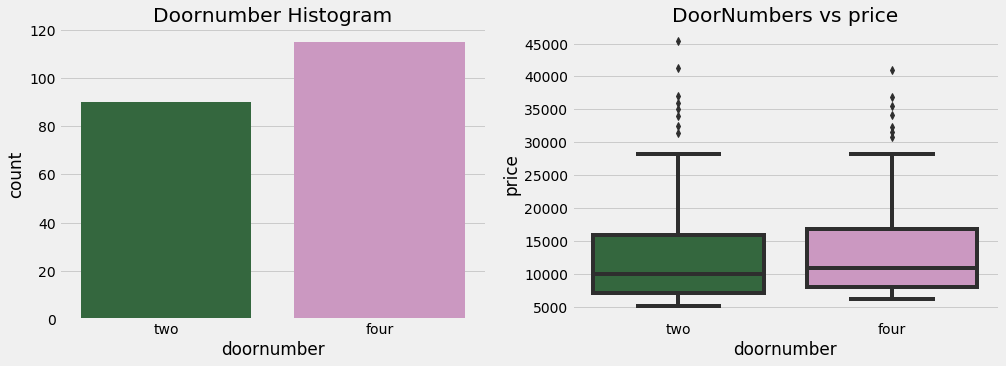

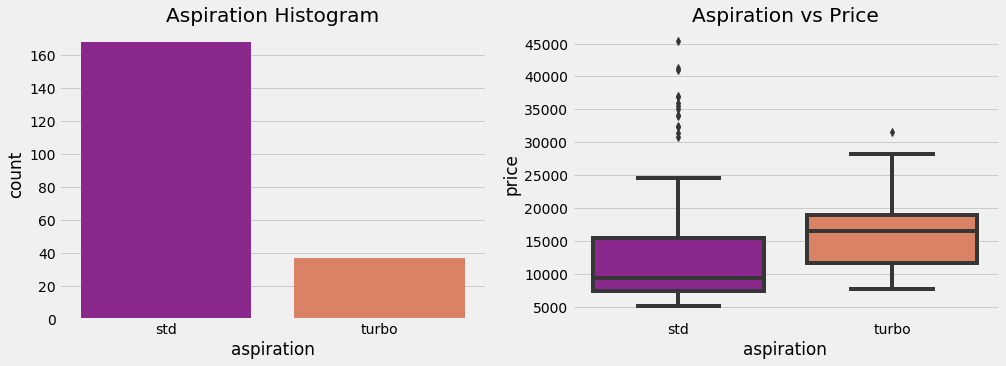

In [18]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(cars.doornumber,palette=('cubehelix'))
plt.title('Doornumber Histogram')

plt.subplot(1,2,2)
sns.boxplot(x=cars.doornumber,y=cars.price,palette=('cubehelix'))
plt.title('DoorNumbers vs price')
plt.show()

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(cars.aspiration,palette=('plasma'))
plt.title('Aspiration Histogram')

plt.subplot(1,2,2)
sns.boxplot(x=cars.aspiration,y=cars.price,palette=('plasma'))
plt.title('Aspiration vs Price')
plt.show()

##### doornumber variable is not affacting the price much. There is no sugnificant difference between the categories in it.
##### It seems aspiration with turbo have higher price range than the std(though it has some high values outside the whiskers.)

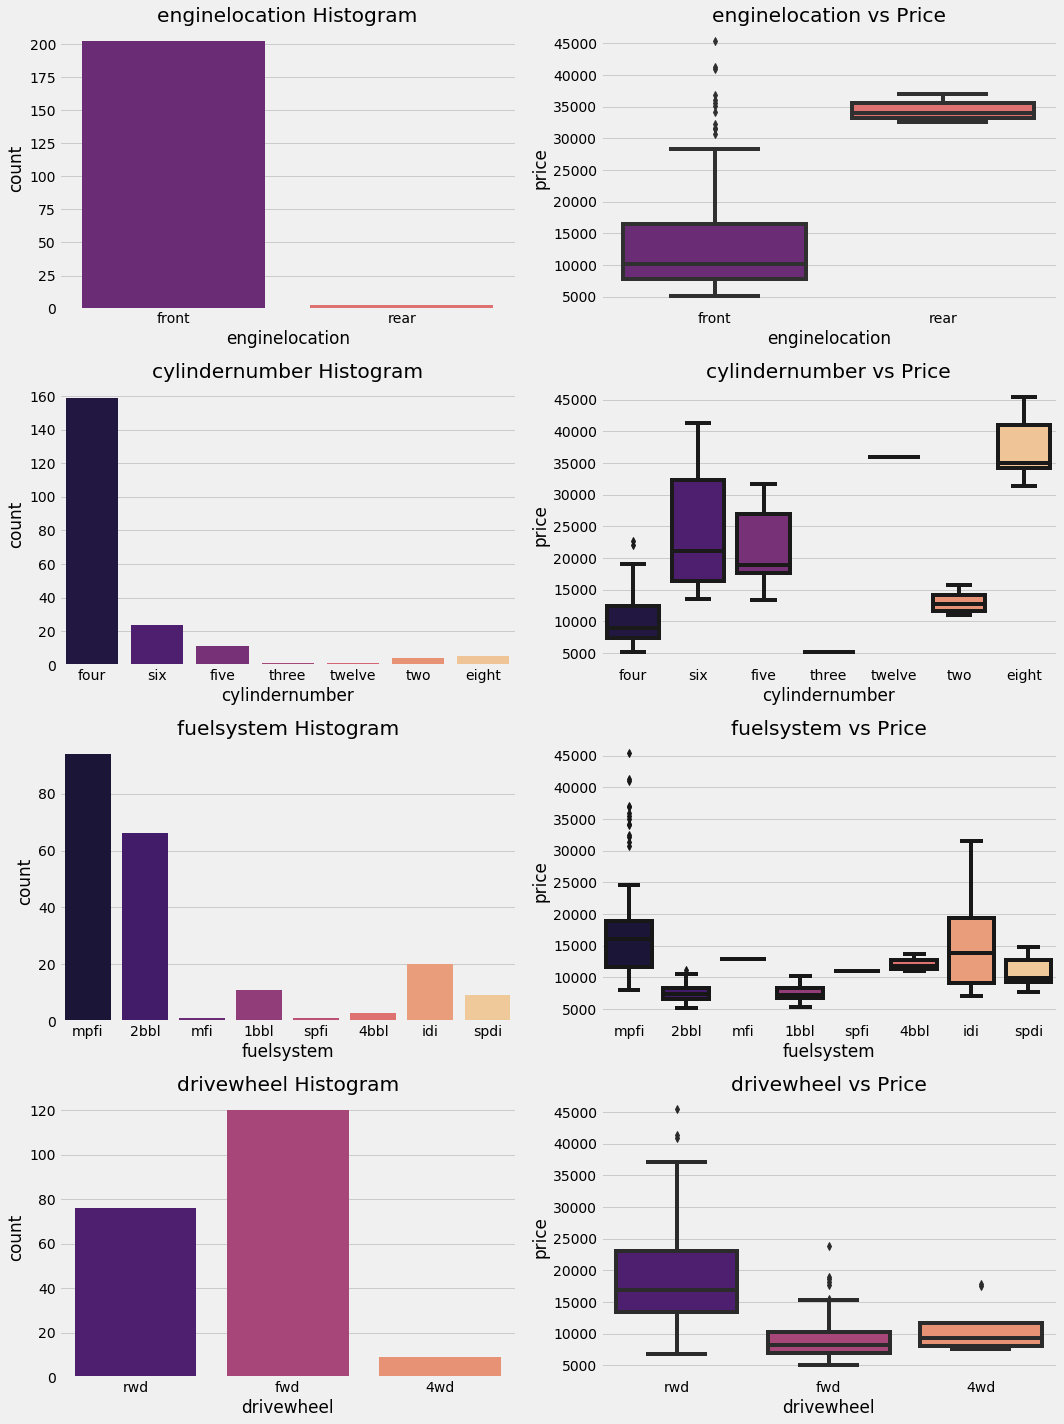

In [19]:
def plot_count(x,fig):
    plt.subplot(4,2,fig)
    plt.title(x+' Histogram')
    sns.countplot(cars[x],palette=("magma"))
    plt.subplot(4,2,(fig+1))
    plt.title(x+' vs Price')
    sns.boxplot(x=cars[x], y=cars.price, palette=("magma"))
    
plt.figure(figsize=(15,20))

plot_count('enginelocation', 1)
plot_count('cylindernumber', 3)
plot_count('fuelsystem', 5)
plot_count('drivewheel', 7)

plt.tight_layout()

###### Very few datapoints for enginelocation categories to make an inference
###### Most common number of cylinders are four, six and five. Though eight cylinders have the highest price range
###### mpfi and 2bbl are most common type of fuel systems. mpfi and idi having the highest price range. But there are few data for other categories to derive any meaningful inference
###### A very significant difference in drivewheel category. Most high ranged cars seeme to prefer rwd drivewheel

#### Categorical Variable Conclusions
##### After looking at the countplots and boxplots for the categorical variables, the number of doors ("doornumber") does not seem to play much of a role in the price. Also, engine location ("enginelocation") only has a few records with values as "rear" and the "front" engine location records have prices across the board. 

In [20]:
cars.select_dtypes(include=['int64','float64'])

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,4800,26,27,22470.0


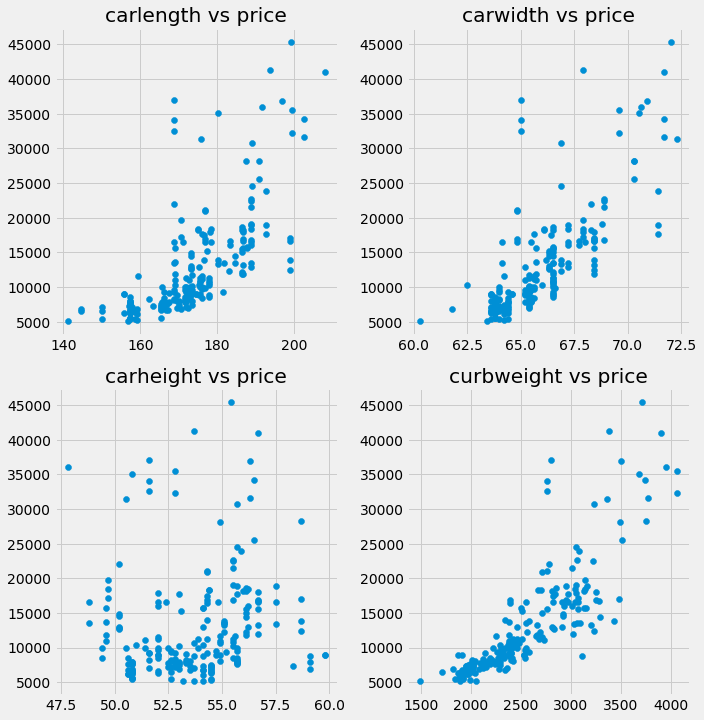

In [21]:
def scatter(x,fig):
    plt.subplot(4,2,fig)
    plt.scatter(cars[x],cars['price'])
    plt.title(x+' vs price')
    
plt.figure(figsize=(10,20))
scatter('carlength',1)
scatter('carwidth',2)
scatter('carheight',3)
scatter('curbweight',4)
plt.tight_layout()

###### carwidth, carlength and curbweight seems to have a poitive correlation with price.
###### carheight doesn't show any significant trend with price.

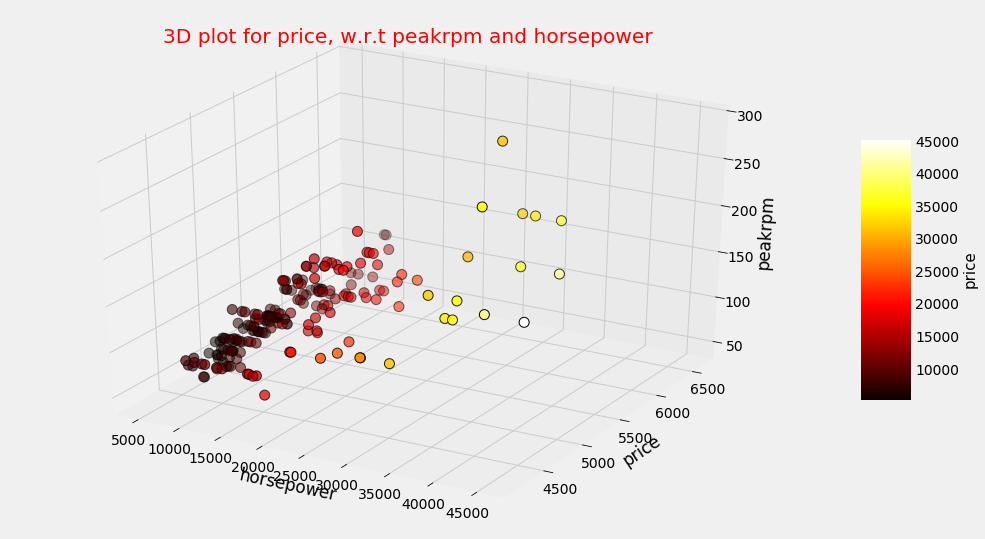

In [78]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(16,9))
ax  = fig.gca(projection = "3d")

plot =  ax.scatter(cars["price"],cars["peakrpm"],cars["horsepower"],linewidth=1,edgecolor ="k",c=cars["price"],s=100,cmap="hot")

ax.set_xlabel("horsepower")
ax.set_ylabel("price")
ax.set_zlabel("peakrpm")

lab = fig.colorbar(plot,shrink=.5,aspect=5)
lab.set_label("price",fontsize = 15)

plt.title("3D plot for price, w.r.t peakrpm and horsepower",color="red")
plt.show()

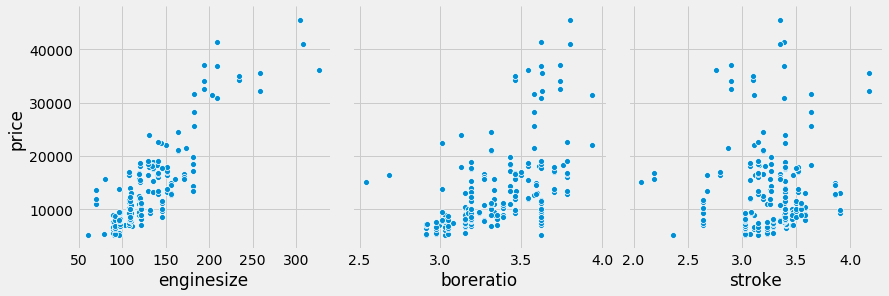

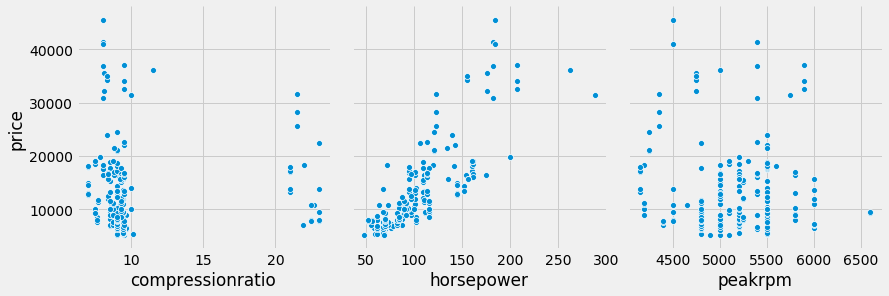

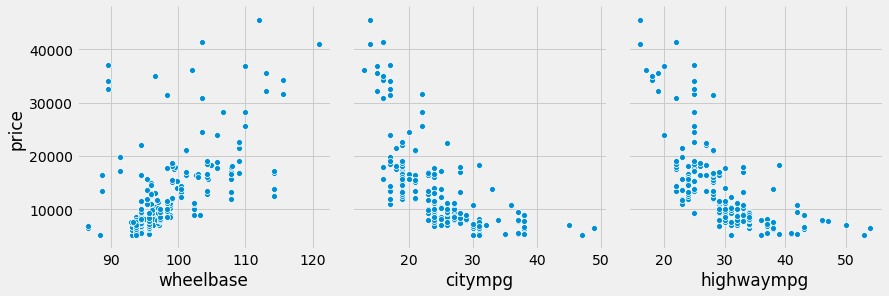

In [22]:
def pp(x,y,z):
    sns.pairplot(cars, x_vars=[x,y,z], y_vars='price',height=4, aspect=1, kind='scatter')
    plt.show()

pp('enginesize', 'boreratio', 'stroke')
pp('compressionratio', 'horsepower', 'peakrpm')
pp('wheelbase', 'citympg', 'highwaympg')

### Numeric Variable Conclusions


###### enginesize, boreratio, horsepower, wheelbase - seem to have a significant positive correlation with price.
###### citympg, highwaympg - seem to have a significant negative correlation with price.

##### After looking at the scatter plots, the numeric variables symboling, carheight, compressionratio and peakrpm do not seem to have a significant correlation with price and will be removed in the restructuring step before modeling.

##### Step 4: Deriving new features

In [23]:
cars['avgmpg'] = (cars['citympg']+cars['highwaympg'])/2


Text(0.5, 1.0, 'Fuel economy vs price')

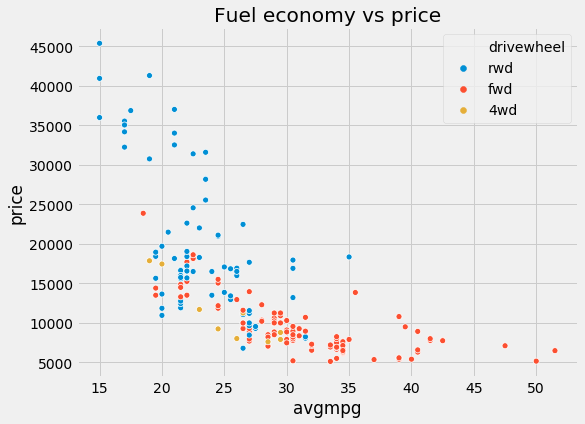

In [24]:
plt.figure(figsize=(8,6))

sns.scatterplot(x=cars['avgmpg'],y=cars['price'],hue=cars['drivewheel'])
plt.title('Fuel economy vs price')


#### fueleconomy has an obvios negative correlation with price and is significant

In [25]:
cars_lr = cars[['price','fueltype','aspiration','carbody','drivewheel','wheelbase','curbweight','enginetype', 'cylindernumber', 'enginesize', 'boreratio','horsepower','avgmpg', 'carlength','carwidth', 'stroke']]
cars_lr

,price,fueltype,aspiration,carbody,drivewheel,wheelbase,curbweight,enginetype,cylindernumber,enginesize,boreratio,horsepower,avgmpg,carlength,carwidth,stroke
0,13495.0,gas,std,convertible,rwd,88.6,2548,dohc,four,130,3.47,111,24.0,168.8,64.1,2.68
1,16500.0,gas,std,convertible,rwd,88.6,2548,dohc,four,130,3.47,111,24.0,168.8,64.1,2.68
2,16500.0,gas,std,hatchback,rwd,94.5,2823,ohcv,six,152,2.68,154,22.5,171.2,65.5,3.47
3,13950.0,gas,std,sedan,fwd,99.8,2337,ohc,four,109,3.19,102,27.0,176.6,66.2,3.40
4,17450.0,gas,std,sedan,4wd,99.4,2824,ohc,five,136,3.19,115,20.0,176.6,66.4,3.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,16845.0,gas,std,sedan,rwd,109.1,2952,ohc,four,141,3.78,114,25.5,188.8,68.9,3.15
201,19045.0,gas,turbo,sedan,rwd,109.1,3049,ohc,four,141,3.78,160,22.0,188.8,68.8,3.15
202,21485.0,gas,std,sedan,rwd,109.1,3012,ohcv,six,173,3.58,134,20.5,188.8,68.9,2.87
203,22470.0,diesel,turbo,sedan,rwd,109.1,3217,ohc,six,145,3.01,106,26.5,188.8,68.9,3.40


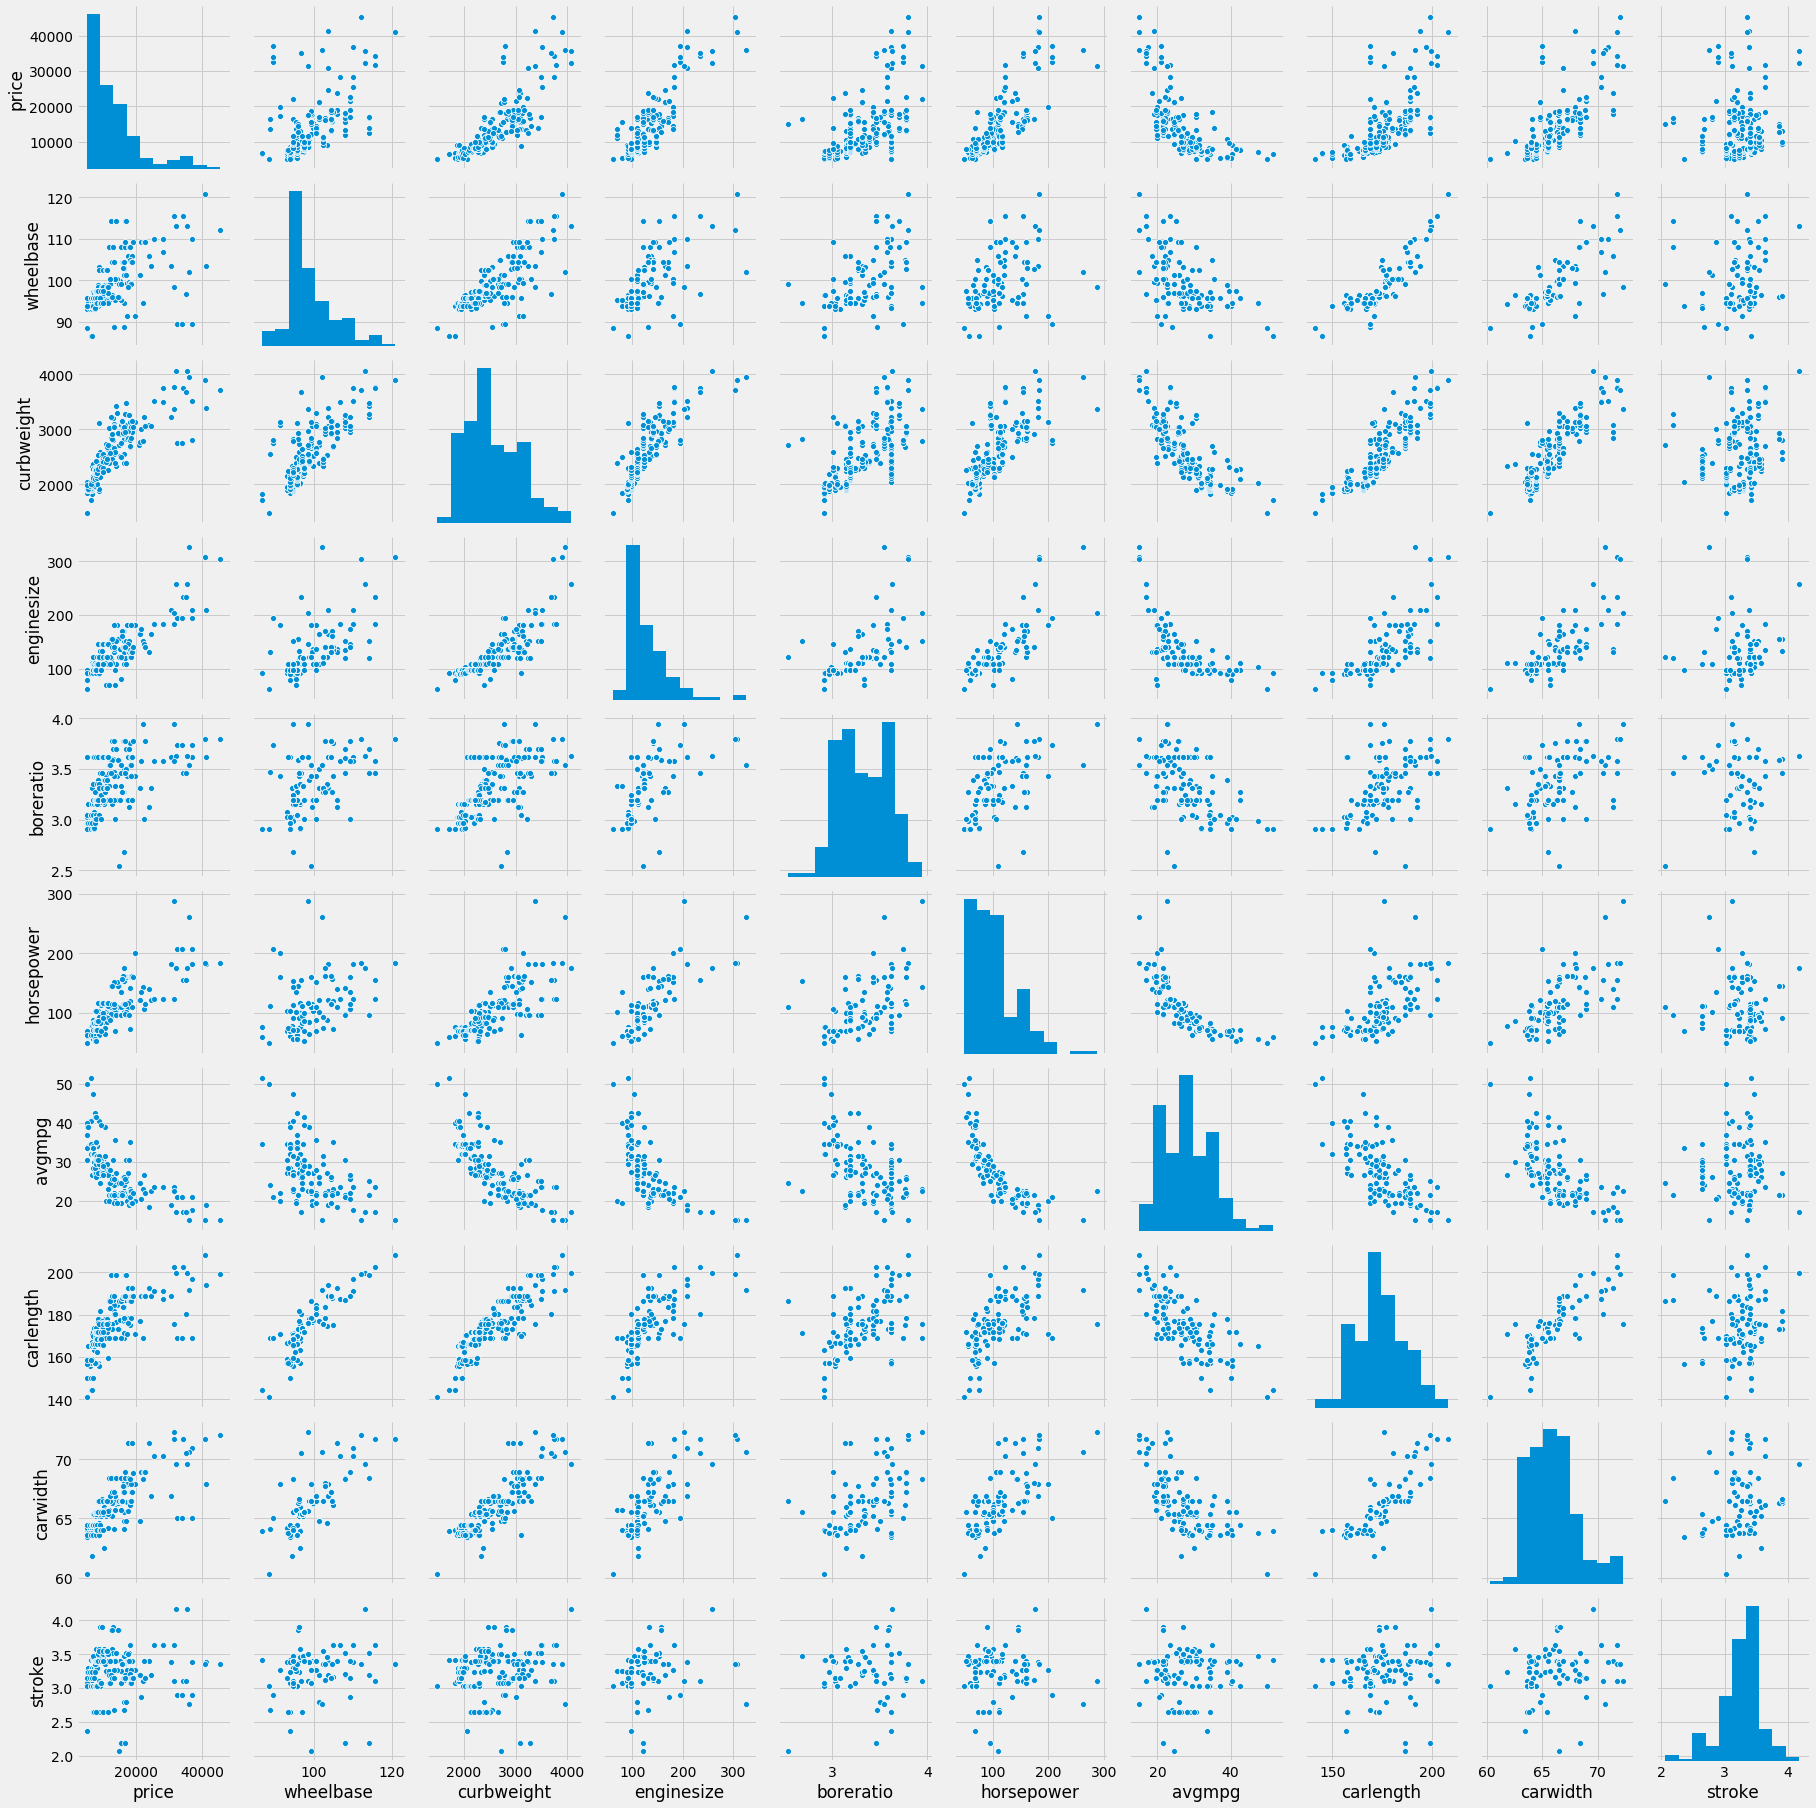

In [26]:
sns.pairplot(cars_lr)
plt.show()

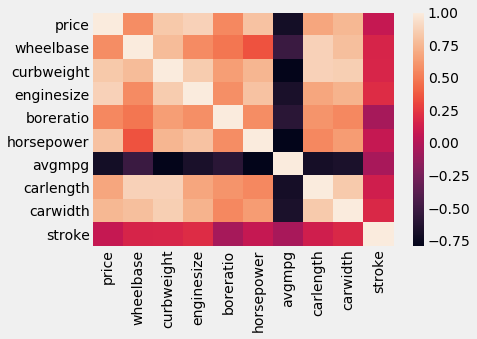

In [27]:
sns.heatmap(cars_lr.corr())

#### Highly correlated variables to price are - curbweight, enginesize, horsepower,carwidth 

#### Step 5: Setting up dummy variables from the categorical variables

In [28]:
cars_lr.select_dtypes(include=['object'])

,fueltype,aspiration,carbody,drivewheel,enginetype,cylindernumber
0,gas,std,convertible,rwd,dohc,four
1,gas,std,convertible,rwd,dohc,four
2,gas,std,hatchback,rwd,ohcv,six
3,gas,std,sedan,fwd,ohc,four
4,gas,std,sedan,4wd,ohc,five
...,...,...,...,...,...,...
200,gas,std,sedan,rwd,ohc,four
201,gas,turbo,sedan,rwd,ohc,four
202,gas,std,sedan,rwd,ohcv,six
203,diesel,turbo,sedan,rwd,ohc,six


In [29]:
def dummies(x,df):
    temp = pd.get_dummies(df[x],drop_first=True)
    df = pd.concat([df,temp],axis=1)
    df.drop([x],axis=1,inplace=True)
    return df

cars_lr = dummies('fueltype',cars_lr)
cars_lr = dummies('aspiration',cars_lr)
cars_lr = dummies('carbody',cars_lr)
cars_lr = dummies('drivewheel',cars_lr)
cars_lr = dummies('enginetype',cars_lr)
cars_lr = dummies('cylindernumber',cars_lr)

In [30]:
cars_lr

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,avgmpg,carlength,carwidth,stroke,...,ohc,ohcf,ohcv,rotor,five,four,six,three,twelve,two
0,13495.0,88.6,2548,130,3.47,111,24.0,168.8,64.1,2.68,...,0,0,0,0,0,1,0,0,0,0
1,16500.0,88.6,2548,130,3.47,111,24.0,168.8,64.1,2.68,...,0,0,0,0,0,1,0,0,0,0
2,16500.0,94.5,2823,152,2.68,154,22.5,171.2,65.5,3.47,...,0,0,1,0,0,0,1,0,0,0
3,13950.0,99.8,2337,109,3.19,102,27.0,176.6,66.2,3.40,...,1,0,0,0,0,1,0,0,0,0
4,17450.0,99.4,2824,136,3.19,115,20.0,176.6,66.4,3.40,...,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,16845.0,109.1,2952,141,3.78,114,25.5,188.8,68.9,3.15,...,1,0,0,0,0,1,0,0,0,0
201,19045.0,109.1,3049,141,3.78,160,22.0,188.8,68.8,3.15,...,1,0,0,0,0,1,0,0,0,0
202,21485.0,109.1,3012,173,3.58,134,20.5,188.8,68.9,2.87,...,0,0,1,0,0,0,1,0,0,0
203,22470.0,109.1,3217,145,3.01,106,26.5,188.8,68.9,3.40,...,1,0,0,0,0,0,1,0,0,0


### Splitting dataset into Training and testing sets

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

y = cars_lr['price']
X = cars_lr.drop(['price'],axis=1)

X_train_org,X_test_org,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train_org)

#fit_transform first fits the original data then transforms it

X_test = scaler.fit_transform(X_test_org)

print("X_train shape: ",X_train.shape)
print("y_train shape: ",y_train.shape)

X_train shape:  (143, 29)
y_train shape:  (143,)


### Building a Model

## Linear Regression

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

lreg = LinearRegression()
lreg.fit(X_train,y_train)

print("R2 Training score: ",lreg.score(X_train,y_train))
print("R2 Testing score: ",lreg.score(X_test,y_test))

R2 Training score:  0.9378776148632398
R2 Testing score:  0.8307990735471132


In [33]:
y_pred = lreg.predict(X_test)

print("R2 score : ",metrics.r2_score(y_test,y_pred))

R2 score :  0.8307990735471132


In [34]:
print(lreg.intercept_)
print(lreg.coef_)

9054.7745296307
[ 4.65612217e+03  7.80583531e+03  3.78235870e+04 -1.16503754e+04
  1.88425912e+04 -4.55189279e+02 -4.65051936e+03  4.44914285e+03
 -1.24475486e+04 -2.93759539e+03 -6.77063861e+02 -3.25967413e+03
 -4.03627022e+03 -2.89962391e+03 -3.93796822e+03  1.69963243e+03
  2.80161308e+03 -1.45519152e-11  2.09423547e+03  4.71232239e+03
  4.71067689e+03 -5.45284855e+03  5.76381618e+03 -1.05948108e+03
 -6.60863654e+01 -1.85710698e+03  0.00000000e+00 -2.13091167e+04
  5.76381618e+03]


In [35]:
test_predict = pd.DataFrame(y_pred,columns=['Predicted_Price'])

test_predict['Predicted_Price'] = round(test_predict['Predicted_Price'],2)

y_test_index = y_test.reset_index()
y_test_index = y_test_index.drop(columns='index',axis=1)
test_predict = pd.concat([y_test_index,test_predict],axis=1)
test_predict.head(10)

,price,Predicted_Price
0,6795.0,5573.52
1,15750.0,19711.32
2,15250.0,15707.23
3,5151.0,-3881.59
4,9995.0,10633.57
5,11199.0,15344.32
6,5389.0,5979.86
7,7898.0,5096.84
8,17199.0,16209.22
9,6529.0,6450.16


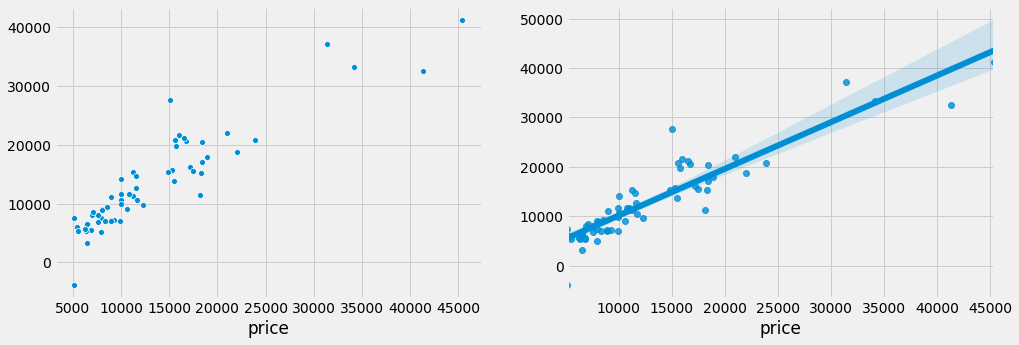

In [36]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.scatterplot(y_test,y_pred)

plt.subplot(1,2,2)
sns.regplot(y_test,y_pred)

## Lasso Regression

In [37]:
from sklearn.linear_model import Lasso

#Testing differrent alpha values for the L1 regularization

alpha_range = [0.01,0.1,1,10,100]
train_score_list = []
test_score_list = []

for alpha in alpha_range:
    lasso = Lasso(alpha)
    lasso.fit(X_train,y_train)
    train_score_list.append(lasso.score(X_train,y_train))
    test_score_list.append(lasso.score(X_test,y_test))

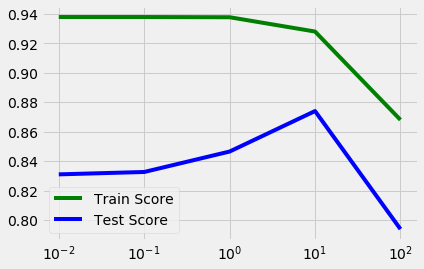

In [38]:
#comparing the different alpha values to see which produces the best score

plt.plot(alpha_range,train_score_list,c='g',label='Train Score')
plt.plot(alpha_range,test_score_list,c='b',label='Test Score')
plt.xscale('log')
plt.legend()


### The best alpha values is alpha=10

In [39]:
lasso = Lasso(10)
lasso.fit(X_train,y_train)
print(lasso.score(X_train,y_train))
print(lasso.score(X_test,y_test))

0.9280194637544277
0.8739937531521971


### Lasso Regression Prediction

     price  Predicted_Price
0   6795.0          6182.13
1  15750.0         22044.28
2  15250.0         16783.71
3   5151.0          5490.01
4   9995.0         10667.43
5  11199.0         16030.34
6   5389.0          6321.82
7   7898.0          6657.15
8  17199.0         18381.84
9   6529.0          6280.79


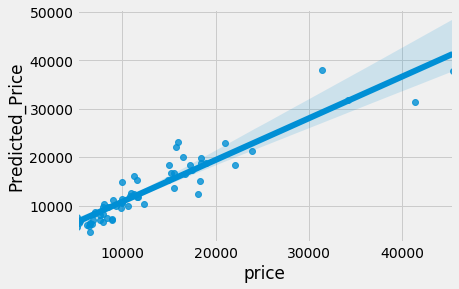

In [40]:
y_pred = lasso.predict(X_test)

test_predict = pd.DataFrame(y_pred,columns=['Predicted_Price'])

test_predict['Predicted_Price'] = round(test_predict['Predicted_Price'],2)

y_test_index = y_test.reset_index()
y_test_index = y_test_index.drop(columns='index',axis=1)
test_predict = pd.concat([y_test_index,test_predict],axis=1)
print(test_predict.head(10))
sns.regplot(x='price',y='Predicted_Price',data=test_predict)

### Use Gridsearch for best alpha

In [41]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
param_grid = {'alpha': [0.01,0.1,1,10,100]}

grid_search = GridSearchCV(Lasso(),param_grid,cv=5)
grid_search.fit(X_train,y_train)

print("Best parameters: {}".format(grid_search.best_params_))

Best parameters: {'alpha': 10}


E:\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 79731216.9244301, tolerance: 632278.7173878575
  positive)
E:\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11626504.314438045, tolerance: 759910.6451935277
  positive)
E:\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 181204101.84493923, tolerance: 709486.1159965218
  positive)
E:\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3710865.869521737, tolerance: 632278.7173878575

In [42]:
lasso = Lasso(alpha=10)
lasso.fit(X_train,y_train)
lasso.score(X_test,y_test)

0.8739937531521971

In [43]:
aram_grid = {'alpha': [0.01,0.1,1,10,100]}

grid_search = GridSearchCV(Ridge(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))

Best parameters: {'alpha': 0.1}


In [44]:
ridge = Ridge(alpha=0.1)
ridge.fit(X_train, y_train)
ridge.score(X_test,y_test)

0.861508207086736

### Model Building with RFE (Recursive Feature Elimination)

In [45]:
#RFE with 15 features

In [50]:
from sklearn.feature_selection import RFE

lr = LinearRegression()
rfe_15 = RFE(lr,15)
rfe_15.fit(X_train,y_train)

print(rfe_15.support_)
print(rfe_15.ranking_)

[ True  True  True  True  True False  True  True  True False False False
  True False  True False False False False  True False  True  True False
 False False False  True  True]
[ 1  1  1  1  1 12  1  1  1  6 11  3  1  2  1  8  7 14  5  1  4  1  1 10
 13  9 15  1  1]


In [51]:
#making prediction using rfe model

In [56]:
y_pred = rfe_15.predict(X_test)

print("R2_score: ",rfe_15.score(X_test,y_test))

R2_score:  0.8491269743621187


In [76]:
#RFE with 6 features

rfe_6 = RFE(lr,6)

rfe_6.fit(X_train,y_train)

print("Score: ",rfe_6.score(X_test,y_test))

Score:  0.8220438444476703
